In [61]:
import pandas as pd
import numpy as np  
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [62]:
# Importing the data / Leitura dos dados

url_rest_data_log = 'https://raw.githubusercontent.com/RafaelGenari/Bootcamp-Project-Report_History_with_Data/refs/heads/main/rest_data_us_upd.csv'

rest_log = pd.read_csv(url_rest_data_log, sep = ',')

## Data Cleaning / Limpeza dos Dados

In [63]:
rest_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [64]:
rest_log.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [65]:
rest_log['id'] = rest_log['id'].astype(str) # changing data type / alterando tipo de dado
rest_log.rename(columns = {'number': 'seats_number', 'object_name': 'restaurant_name'}, inplace = True) # renomeando coluna number / renaming number column

In [ ]:
rest_log.info() # checking information / verificando informação
print()
rest_log.describe() # checking description / verificando descrição

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               9651 non-null   object
 1   restaurant_name  9651 non-null   object
 2   address          9651 non-null   object
 3   chain            9648 non-null   object
 4   object_type      9651 non-null   object
 5   seats_number     9651 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 452.5+ KB



,seats_number
count,9651.000000
mean,43.695161
std,47.622874
min,1.000000
25%,14.000000
50%,27.000000
75%,46.000000
max,229.000000


- Nos dados recebidos podemos notar que temos 6 colunas, sendo elas: id - identificador do restaurante, object_name — nome de estabelecimento, chain — se é ou não estabelecimento de rede, object_type — tipo de estabelecimento, address — endereço, number — número de assentos. As colunas id e number estão como int e as restante como string.

    Os primeiros ajustes a serem feitos foram alterar os nomes das colunas number e object_name para seats_number e restaurant_name, respectivamente, bem como alterar o tipo da coluna id para string.

    Também temos que os dados tem uma média de 44 assentos por restaurante, sendo o mínimo de 1 assento e o máximo de 229, onde 25% dos valores estão abaixo de 14 assentos, 50% abaixo dos 27 assentos e 75% abaixo dos 46 assentos.

- Durante a análise, como podemos ver de forma mais clara no último gráfico da EDA, verfica-se alguns dados como nome de rua com apenas uma única letra, como por exemplo 'W' ou 'E'. Por se tratar de um nome de rua não é comum que seja apenas com uma única letra, porém não foram removidos esses dados por ter valores bem expressivos.

## Restaurant Types Proportion / Proporção dos Tipos de Estabelecimentos

In [67]:
object_type_proportion = rest_log['object_type'].value_counts(normalize=True).reset_index() # creating a dataframe with the proportions of each type of object / criando um dataframe com proporções de cada tipo de objeto
object_type_proportion

,object_type,proportion
0,Restaurant,0.751736
1,Fast Food,0.110455
2,Cafe,0.045073
3,Pizza,0.033157
4,Bar,0.030256
5,Bakery,0.029323


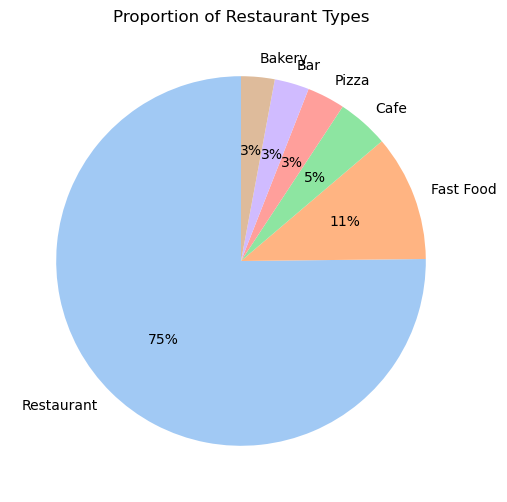

In [ ]:
# graphic with the proportions of each type of object / gráfico com proporções de cada tipo de objeto


plt.figure(figsize = (8,6))
plt.pie(object_type_proportion['proportion'], labels = object_type_proportion['object_type'], autopct = '%1.0f%%' , startangle = 90 , colors = sns.color_palette('pastel'))
plt.title('Proportion of Restaurant Types')
plt.show();

- Ao analisarmos as proporções dos tipos de estabelecimentos, nos deparamos que a maior parte dos dados (75%) são classificados como restaurantes, tendo em segundo lugar 11% dos dados como fast food. As demais classificações estão abaixo dos 10% tendo café com 5% da classificação e por último barkery, bar e pizzaria todos com 3% cada.

## Chain Restaurant Proportion / Proporção dos Estabelecimentos de Rede

In [ ]:
chain_proportion = rest_log['chain'].value_counts(normalize=True).reset_index() # creating a dataframe with the proportions of each type of object (chain or not) / criando um dataframe com proporções de cada tipo de objeto (rede ou não)
chain_proportion

,chain,proportion
0,False,0.618988
1,True,0.381012


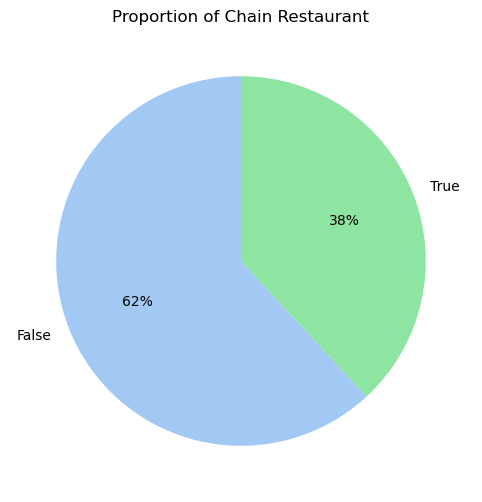

In [ ]:
# graphic with the proportions of each type of object (chain or not) / gráfico com proporções de cada tipo de objeto (rede ou não)

plt.figure(figsize = (8,6))
plt.pie(chain_proportion['proportion'], labels = chain_proportion['chain'], autopct='%1.0f%%' , startangle = 90 , colors=sns.color_palette('pastel6'))
plt.title('Proportion of Chain Restaurant')
plt.show();

- Quanto a proporção de estabelecimentos de rede ou não, temos que 62% dos dados não são estabelecimentos de rede e apenas 38% são estabelecimentos de rede.

## Type of Typical Chain Restaurant / Tipos Típicos de Estabelecimentos de Rede

In [ ]:
typical_chain_restaurants = rest_log.groupby('object_type')['chain'].sum().reset_index() # grouping data by object type / agrupando os dados por tipo de objeto
typical_chain_restaurants.rename(columns = {'chain': 'chain_count'}, inplace = True) # renomeando coluna number / renaming number column
typical_chain_restaurants_sorted = typical_chain_restaurants.sort_values('chain_count', ascending = False) # sorting data by chain count/ ordenando os dados por contagem de estabelecimentos derede
typical_chain_restaurants_sorted

,object_type,chain_count
5,Restaurant,2292
3,Fast Food,605
0,Bakery,283
2,Cafe,266
4,Pizza,153
1,Bar,77


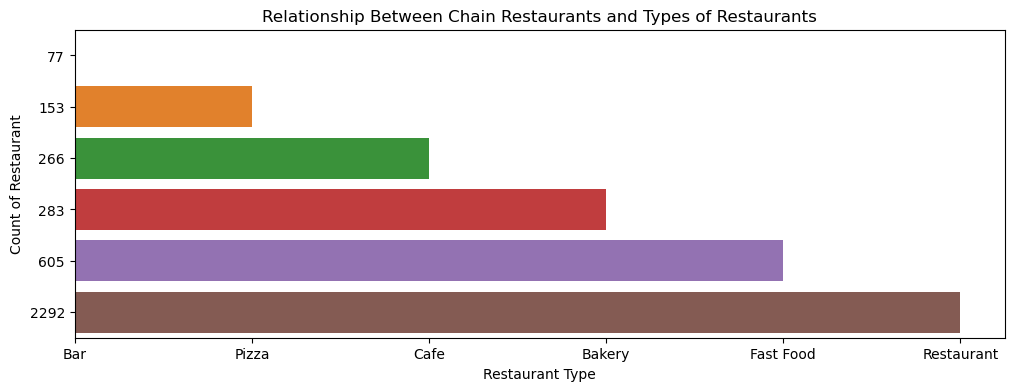

In [ ]:
# graphic with the type of typical chain restaurants / gráfico com os tipos de estabelecimentos típicos de rede

plt.figure(figsize=(12, 4))
sns.barplot(x = 'object_type', y = 'chain_count', data = typical_chain_restaurants_sorted, hue = 'object_type', orient = 'y', legend = False)
plt.title('Relationship Between Chain Restaurants and Types of Restaurants')
plt.xlabel('Restaurant Type')
plt.ylabel('Count of Restaurant')
plt.show();

- Analisando os tipos típicos de estabelecimento de rede, podemos perceber que das 6 categorias existentes, uma se destaca em primeiro lugar (restaurant) com basicamente 3.7x do que o segundo lugar (Fast Food) e este mesmo segundo lugar quase 2.1x maior que a terceira posição. Temos o meio da tabela, da terceira posição até a quinta (Bakery, Cafe, Pizza) valores semelhantes, contudo, a última posição (Bar) é a única que não esta dentro da casa dos 100 estabelecimentos.

## Characterization of Chain Restaurants / Caracterização Estabelecimentos de Rede

In [ ]:
characterizes_chain_restaurants = rest_log.groupby('seats_number')['chain'].sum().reset_index() # grouping data by seats number / agrupando os dados por quantidade de assentos
characterizes_chain_restaurants.rename(columns = {'chain': 'chain_count'}, inplace = True) # renomeando coluna number / renaming number column
characterizes_chain_restaurants

,seats_number,chain_count
0,1,77
1,2,72
2,3,84
3,4,73
4,5,69
...,...,...
211,225,2
212,226,1
213,227,2
214,228,1


In [74]:
# defining color of points / definindo cor pontos

def point_color(value: float) -> str:
    return 'green' if value < 50 else 'red'

characterizes_chain_restaurants['point_color'] = characterizes_chain_restaurants['seats_number'].apply(point_color)

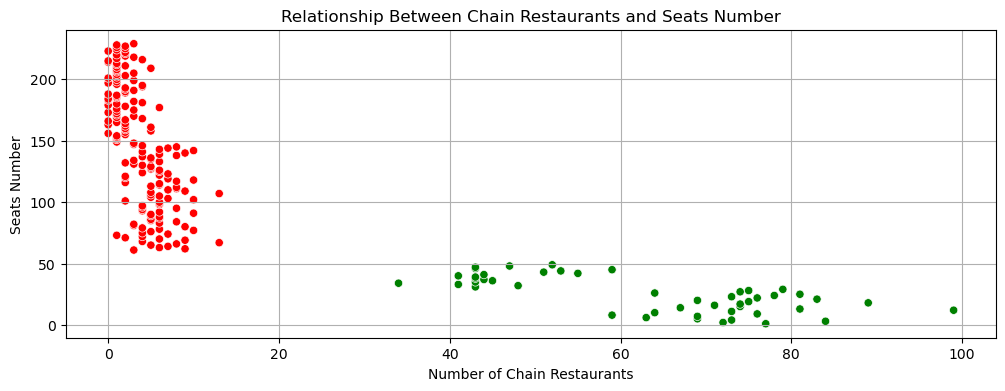

In [ ]:
# graphic with the relationship between chain restaurants and seats number / gráfico com a relação entre estabelecimentos de rede e quantidade de assentos

plt.figure(figsize=(12, 4))
sns.scatterplot(x = 'chain_count', y = 'seats_number', data = characterizes_chain_restaurants, color = characterizes_chain_restaurants['point_color'], legend = False)
plt.title('Relationship Between Chain Restaurants and Seats Number')
plt.xlabel('Number of Chain Restaurants')
plt.ylabel('Seats Number')
plt.grid()
plt.show()

- Quando buscamos uma caracterização para os estabelecimentos de rede, podemos chegar a conclusão de que a maioria dos estabelecimentos tem poucos assentos como podemos ver no gráfico na parte mais baixa onde estão os pontos verde, diferente dos pontos vermelhos que estão mais aglomerados no canto superior esquerdo da tabela, tendo assim um grande número de assentos, contudo, não sendo em sua grande maioria estabelecimentos de rede.

## Mean Seats by Restaurants Type / Média de Assentos Por Tipo de Restaurante

In [ ]:
mean_seats_per_restaurant = rest_log.groupby('object_type')['seats_number'].mean().reset_index() # grouping data by object type / agrupando os dados por tipo de objeto
mean_seats_per_restaurant_sorted = mean_seats_per_restaurant.sort_values('seats_number', ascending = False) # sorting data by seats number / ordenando os dados por quantidade de assentos
mean_seats_per_restaurant_sorted

,object_type,seats_number
5,Restaurant,48.042316
1,Bar,44.767123
3,Fast Food,31.837711
4,Pizza,28.459375
2,Cafe,25.000000
0,Bakery,21.773852


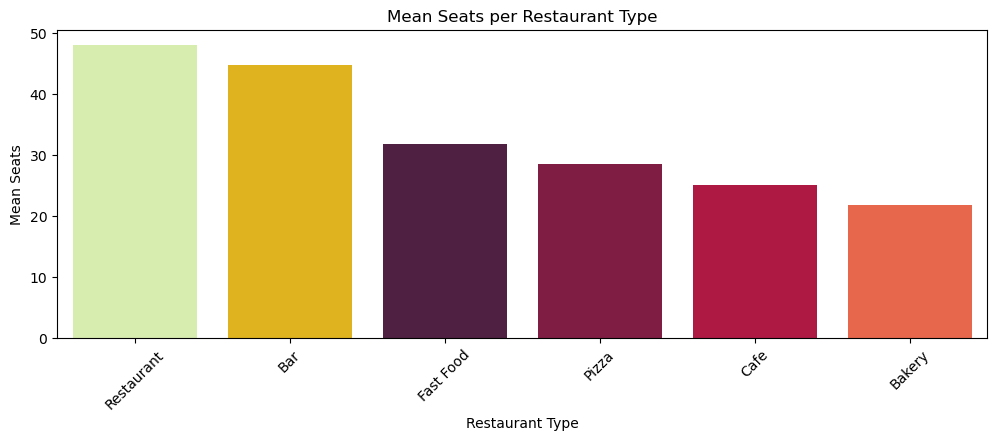

In [ ]:
# graphic with the mean seats per restaurant type / gráfico com a média de assentos por tipo de estabelecimento

plt.figure(figsize=(12, 4))
sns.barplot(x = 'object_type', y = 'seats_number', data = mean_seats_per_restaurant_sorted, hue = 'seats_number', palette = ['#FF5733',
                                                                                                                      '#C70039',
                                                                                                                      '#900C3F',
                                                                                                                      '#581845',
                                                                                                                      '#FFC300',
                                                                                                                      '#DAF7A6'], legend = False)
plt.title('Mean Seats per Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Mean Seats')
plt.xticks(rotation=45)
plt.show();

- Referente a média de assentos pelo tipo de estabelecimentos pode-se notar que estabelecimentos como barkery (padarias), cafés e pizzarias tem uma média menor de assento, onde essa questão pode estar relacionada com o tipo de estabelecimento, comidas servidas, tamanho do local que se encontra, mas também porque normalmente estes tipos são locais em que as pessoas vão e não costumam ficar tanto tempo. Diferente de restaurantes e bares, os quais ambos tem uma média de 48 e 44 assentos, respectivamente, e tal fator pode ser pelas questões citadas acima também ou por serem tipos de estabelecimentos que as pessoas costumar passar mais tempo dentro, assim ocupando o espaço por mais tempo que nos demais tipos.

## Top 10 Streets With More Restaurants / Top 10 Ruas com Maior Número de Restaurantes

In [ ]:
rest_log['street_name'] = rest_log['address'].str.extract(r'^\d+\s([A-Za-z\s]+)') # extracting street name from address / extraindo o nome da rua do endereço
rest_log

,id,restaurant_name,address,chain,object_type,seats_number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE


In [ ]:
count_restaurant_per_street = rest_log.groupby('street_name')['restaurant_name'].count().reset_index() # grouping data by street name / agrupando os dados por nome da rua
count_restaurant_per_street = count_restaurant_per_street.rename(columns={'restaurant_name': 'restaurant_count'}) # renaming column / renomeando coluna
count_restaurant_per_street

,street_name,restaurant_count
0,ABBOT KINNEY,1
1,ABBOT KINNEY BLVD,3
2,ACADEMY DR,1
3,AIRPORT BLVD,10
4,ALAMEDA ST,1
...,...,...
1390,YUCCA ST,3
1391,Z,1
1392,ZONAL AVE,4
1393,ZOO DR,1


In [ ]:
top_10_streets = count_restaurant_per_street.sort_values('restaurant_count', ascending = False).head(10) # sorting data by restaurant count / ordenando os dados por contagem de estabelecimentos
top_10_streets

,street_name,restaurant_count
1132,W,756
142,E,320
1256,W SUNSET BLVD,296
1233,W PICO BLVD,288
290,HOLLYWOOD BLVD,167
1339,WILSHIRE BLVD,161
960,S VERMONT AVE,148
1015,SANTA MONICA BLVD,146
45,BEVERLY BLVD,135
754,S FIGUEROA ST,134


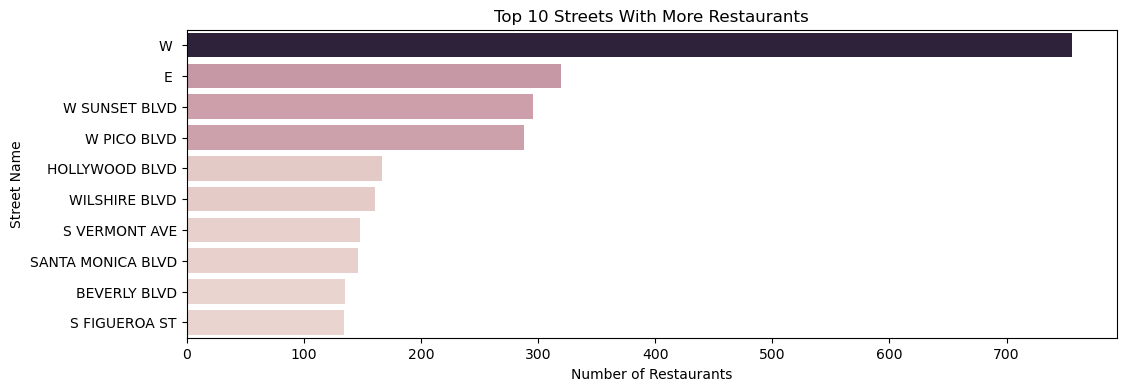

In [ ]:
# graphic with the top 10 streets with more restaurants / gráfico com as 10 ruas com mais estabelecimentos

plt.figure(figsize=(12, 4))
sns.barplot(x = 'restaurant_count', y = 'street_name', data = top_10_streets, hue = 'restaurant_count', orient = 'y', legend = False)
plt.title('Top 10 Streets With More Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Street Name')
plt.show();

- Ao separarmos o top 10 de ruas com mais restaurantes, podemos ver um grande diferença do primeiro lugar para o restante da lista, onde o mesmo tem 756 restaurantes enquanto a segunda posição está na casa dos 320 restaurantes. A terceira e quarta posição estão acima dos 250 restaurantes, contudo, da quinta posição até a décima os números estão bem próximos tendo uma diferença de apenas 33 assentos entre as posições indicas.

## Streets With Only 1 Restaurant / Ruas com Apenas 1 Restaurante

In [82]:
one_restaurant_street = count_restaurant_per_street[count_restaurant_per_street['restaurant_count'] == 1] # filtering data by one restaurant per street / filtrando os dados por um restaurante por rua
number_of_one_restaurant_streets = one_restaurant_street.shape[0] # getting the number of streets with one restaurant / obtendo o número de ruas com um restaurante

print(f"Número de ruas com apenas um restaurante: {number_of_one_restaurant_streets}")

Número de ruas com apenas um restaurante: 795


## Distribution of Seats on Streets with Many Restaurants / Distribuição de Assentos em Ruas com Muitos Restaurantes

In [ ]:
streets = rest_log.groupby('street_name')['restaurant_name'].count().reset_index() # grouping data by street name and counting the number of restaurants / agrupando os dados por nome da rua e contando o número de estabelecimentos
streets.rename(columns={'restaurant_name': 'restaurant_count'}, inplace=True) # renaming column / renomeando coluna
seats = rest_log.groupby('street_name')['seats_number'].sum().reset_index() # grouping data by street name and summing the seats number / agrupando os dados por nome da rua e contando o número de assentos
seats.rename(columns={'seats_number': 'total_seats'}, inplace=True) # renaming column / renomeando coluna
street_data  = pd.merge(streets, seats) # merging datas / juntandos as informações
street_data 

,street_name,restaurant_count,total_seats
0,ABBOT KINNEY,1,4
1,ABBOT KINNEY BLVD,3,70
2,ACADEMY DR,1,178
3,AIRPORT BLVD,10,830
4,ALAMEDA ST,1,5
...,...,...,...
1390,YUCCA ST,3,90
1391,Z,1,190
1392,ZONAL AVE,4,253
1393,ZOO DR,1,10


In [85]:
higher_restaurant_streets = street_data[street_data['restaurant_count'] > 10] # filtering data by more than 10 restaurants per street / filtrando os dados por mais de 10 restaurantes por rua
higher_restaurant_streets = higher_restaurant_streets.sort_values('restaurant_count', ascending = False).head(10) # sorting data by restaurant count / ordenando os dados por contagem de estabelecimentos
higher_restaurant_streets

,street_name,restaurant_count,total_seats
1132,W,756,33217
142,E,320,11404
1256,W SUNSET BLVD,296,15072
1233,W PICO BLVD,288,11773
290,HOLLYWOOD BLVD,167,8973
1339,WILSHIRE BLVD,161,10003
960,S VERMONT AVE,148,6790
1015,SANTA MONICA BLVD,146,4729
45,BEVERLY BLVD,135,6044
754,S FIGUEROA ST,134,6802


In [86]:
seat_distribution = rest_log[rest_log['street_name'].isin(higher_restaurant_streets['street_name'])] # filtering data by streets with more than 10 restaurants / filtrando os dados por ruas com mais de 10 restaurantes

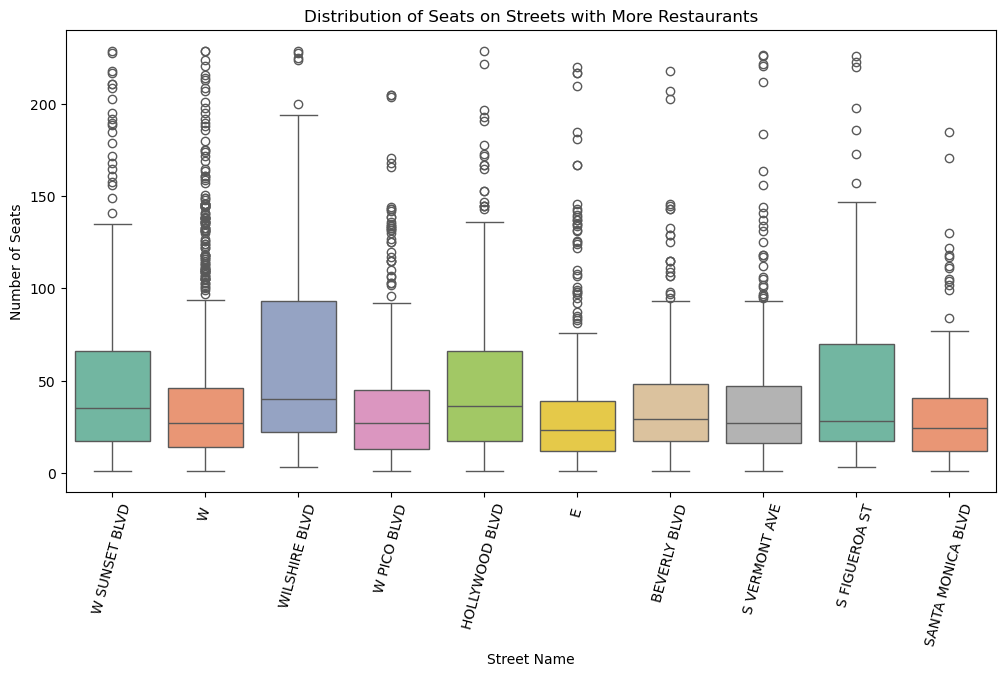

In [ ]:
# graphic with the distribution of seats on streets with more than 10 restaurants / gráfico com a distribuição de assentos em ruas com mais de 10 restaurantes

plt.figure(figsize=(12, 6))
sns.boxplot(x = 'street_name', y = 'seats_number', data = seat_distribution, hue = 'street_name', palette = 'Set2')
plt.xticks(rotation=75)
plt.title('Distribution of Seats on Streets with More Restaurants')
plt.xlabel('Street Name')
plt.ylabel('Number of Seats')
plt.show()

- Ao olharmos para a distribuição de assentos para ruas com mais restaurantes, onde coloquei mais de 10 restaurantes como filtro, podemos notar que uma rua tem o dobro de restaurantes e quase o triplo de assentos que outo restaurante, contudo, ao olharmos o gráfico de distribuição vemos que essa rua que tem uma quantidade muito maior tem basicamente a mesma distribuição que uma rua com menor quantidade em ambas as categorias. Além disso, a mediana de todos os casos são muito parecidas.

    No projeto não é solicitado, mas ao verificar essa distribuição semelhante poderíamos levantar hipóteses para verificar se o tamanho da rua influencia nesta distribuição ou até mesmo localização da mesma.


## Conclusion / Conclusão

 - Podemos concluir que um restaurante de rede, de modo geral, serão restaurantes com menos assentos, que pode ser devido a grande rotatividade e clientes existentes, enquanto restaurantes que já não são de rede tendem a ter mais assentos. Além disso, foi possível perceber que apesar de uma rua ter muitos restaurantes, por vezes, a distribuição dos mesmos poderão ser semelhantes do que uma rua que tem uma menor quantidade.

    Outro ponto que podemos levantar desta análise é o que o tipo de restaurante pode influenciar na média de assentos de um estabelecimento, pois podem ser levada em considerações questões como quantidade de tempo que um cliente fica no estabelecimento e com isso sendo preciso ajustar a quantidade de assentos, assim aumentando a média, por ter uma menor rotatividade nos clientes ou vice e versa.